# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


#Observations - 
#The cities that were represented in my dataset showed a moderate correlation between latitude and max temp
#based on the r-squared values, and with a much stronger correlation in the southern hemishpere (approaching a strong
#correlation.  However, the southern hemisphere df only had 173 cities while the northern had more that double at 356.

#There was almost correlation betweem latitude and humidity, which a little suprising to me


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# np.random.seed to keep same random data set for each run
np.random.seed(1688)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up dictionary for data from get requests for all relevant columns needed for this exercise and next one

data_dict = {'City':[],
             'Latitude':[],
             'Longitude':[],
             'Max Temp':[],
             'Humidity':[],
             'Cloudiness':[],
             'Wind Speed':[],
             'Country' :[]}

#set base url and counter for city #
url = "http://api.openweathermap.org/data/2.5/weather?"


i = 1
for city in cities:

    try:
      
 
        query_url = url + "appid=" + "weather_api_key" + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_id = weather_json['id']
        data_dict['City'].append(weather_json['name'])
        data_dict['Latitude'].append(weather_json['coord']['lat'])
        data_dict['Longitude'].append(weather_json['coord']['lon'])
        data_dict['Max Temp'].append(weather_json['main']['temp_max'])
        data_dict['Humidity'].append(weather_json['main']['humidity'])
        data_dict['Cloudiness'].append(weather_json['clouds']['all'])
        data_dict['Wind Speed'].append(weather_json['wind']['speed'])
        data_dict['Country'].append(weather_json['sys']['country'])
        print(f'City name:{city} ID: {i}')
        
        
        
    except KeyError:
        print('skipping city') 
        cities.remove(city)
    i += 1 


City name:ushuaia ID: 1
City name:alyangula ID: 2
City name:hithadhoo ID: 3
City name:juneau ID: 4
City name:atuona ID: 5
City name:port elizabeth ID: 6
City name:san patricio ID: 7
City name:aromashevo ID: 8
City name:albany ID: 9
City name:yellowknife ID: 10
City name:berlevag ID: 11
City name:rikitea ID: 12
City name:faya ID: 13
City name:butaritari ID: 14
City name:bluff ID: 15
City name:qaanaaq ID: 16
City name:punta arenas ID: 17
City name:rawson ID: 18
City name:saldanha ID: 19
skipping city
City name:mangai ID: 21
City name:hays ID: 22
City name:mahebourg ID: 23
City name:arraial do cabo ID: 24
City name:saint-philippe ID: 25
City name:vaini ID: 26
City name:omboue ID: 27
City name:lorengau ID: 28
City name:dhidhdhoo ID: 29
City name:mazagao ID: 30
City name:ponta do sol ID: 31
City name:skole ID: 32
City name:mar del plata ID: 33
City name:hobart ID: 34
skipping city
City name:dandong ID: 36
City name:talnakh ID: 37
City name:kavieng ID: 38
City name:provideniya ID: 39
City na

City name:puri ID: 318
City name:lenoir city ID: 319
City name:smithers ID: 320
City name:rio grande ID: 321
City name:grand gaube ID: 322
City name:ordzhonikidze ID: 323
City name:port macquarie ID: 324
City name:jingcheng ID: 325
City name:tutoia ID: 326
City name:finale emilia ID: 327
City name:margate ID: 328
City name:manakara ID: 329
City name:lahaina ID: 330
skipping city
City name:viransehir ID: 332
City name:mnogovershinnyy ID: 333
City name:tongliao ID: 334
City name:sehithwa ID: 335
City name:mwinilunga ID: 336
City name:muleba ID: 337
City name:muisne ID: 338
skipping city
City name:mehamn ID: 340
City name:corinto ID: 341
City name:sayyan ID: 342
skipping city
City name:pacific grove ID: 344
City name:arinos ID: 345
City name:narsaq ID: 346
City name:sinnamary ID: 347
City name:celestun ID: 348
City name:sangar ID: 349
City name:yulara ID: 350
City name:iqaluit ID: 351
City name:matay ID: 352
City name:rolla ID: 353
City name:tubuala ID: 354
City name:polunochnoye ID: 355


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#change dict to dataframe

data_df = pd.DataFrame.from_dict(data_dict)


#export to CSV

data_df.to_csv('API_HW.csv', index=False)
data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Ushuaia,-54.80,-68.30,28.40,86,0,5.82,AR
1,Alyangula,-13.85,136.42,64.40,100,3,11.30,AU
2,Hithadhoo,-0.60,73.08,83.86,64,21,1.66,MV
3,Juneau,58.30,-134.42,60.80,59,90,4.70,US
4,Atuona,-9.80,-139.03,80.08,73,22,20.00,PF


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#check if any cities have humidity > 100%

humidity_dq = data_df.loc[(data_df['Humidity'] > 100)]
humidity_dq


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [ ]:
#  Get the indices of cities that have humidity over 100%.
#NA

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#NA

In [ ]:
# Extract relevant fields from the data frame
#NA

# Export the City_Data into a csv
#NA

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

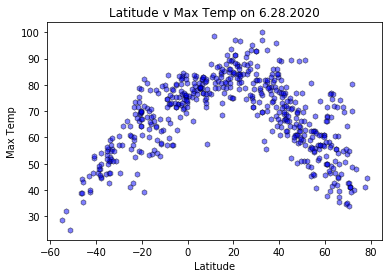

In [9]:
#Latitude v Temperature Plot

x = data_df['Latitude']
y = data_df['Max Temp']



# Plot
plt.scatter(x, y, s=30, marker='h', c='blue', edgecolor='black', linewidth=0.75, alpha=0.5)
plt.title('Latitude v Max Temp on 6.28.2020')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("images/scatter_lat_temp.png")

plt.show()

## Latitude vs. Humidity Plot

In [ ]:
#Latitude v Humidity
x = data_df['Latitude']
y = data_df['Humidity']


plt.scatter(x, y, s=30, marker='D', c='green', edgecolor='black', linewidth=0.75, alpha=0.5)
plt.title('Latitude v Humidity on 6.28.2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("images/scatter_lat_humid.png")
plt.show()


## Latitude vs. Cloudiness Plot

In [ ]:
#Latitude v Cloudiness

x = data_df['Latitude']
y = data_df['Cloudiness']


plt.scatter(x, y, s=25, marker='s', c='red', edgecolor='black', linewidth=0.75, alpha=0.5)
plt.title('Latitude v Cloudiness on 6.28.2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("images/scatter_lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
#latitude v Wind Speed

x = data_df['Latitude']
y = data_df['Wind Speed']


plt.scatter(x, y, s= 40, marker='*', c='purple', edgecolor='black', linewidth=0.75, alpha=0.5)
plt.title('Latitude v Wind Speed on 6.28.2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_regress():
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.annotate(line_eq, (0,0.2), xycoords='axes fraction', fontsize = 12, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {r_value**2}")
    
    
    plt.show()    
    

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = data_df.loc[(data_df['Latitude'] > 0)]


southern_df = data_df.loc[(data_df['Latitude'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x = northern_df['Latitude']
y = northern_df['Max Temp']
y_label = 'Max Temp'


linear_regress()

plt.savefig("images/regress_nlat_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression¶

x = southern_df['Latitude']
y = southern_df['Max Temp']
y_label = 'Max Temp'


linear_regress()

plt.savefig("images/regress_slat_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x = northern_df['Latitude']
y = northern_df['Humidity']
y_label = 'Humidity'


linear_regress()

plt.savefig("images/regress_nlat_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x = southern_df['Latitude']
y = southern_df['Humidity']
y_label = 'Humidity'

linear_regress()

plt.savefig("images/regress_slat_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x = northern_df['Latitude']
y = northern_df['Cloudiness']
y_label = 'Cloudiness'


linear_regress()

plt.savefig("images/regress_nlat_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x = southern_df['Latitude']
y = southern_df['Cloudiness']
y_label = 'Cloudiness'


linear_regress()

plt.savefig("images/regress_slat_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression



x = northern_df['Latitude']
y = northern_df['Wind Speed']

y_label = 'Wind Speed'


linear_regress()
plt.savefig("images/regress_nlat_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x = southern_df['Latitude']
y = southern_df['Wind Speed']
y_label = 'Wind Speed'


linear_regress()

plt.savefig("images/regress_slat_wind.png")
